# 🔍 Is it Normal? 4 Ways to Test for Normality

Before applying many Machine Learning models (like Linear Regression or LDA), you must verify the **Normality Assumption**. Here is how to do it systematically.

---

### 1. Visual Inspection (The Intuitive Way)
The first step should always be looking at the data. 

* **Histogram with KDE:** Look for the classic "Bell Curve." It should be symmetrical with a single peak.
* **Q-Q Plot (Quantile-Quantile Plot):** This is the most reliable visual tool. 
    * **Normal:** Points follow the 45-degree diagonal line.
    * **Non-Normal:** Points curve away from the line at the ends (indicating skewness or heavy tails).



---

### 2. Statistical Moments (Skewness & Kurtosis)
You can quantify the shape using the "moments" we discussed earlier:

* **Skewness:** Should be close to **0**. 
    * Rule of thumb: Values between -0.5 and 0.5 are considered nearly symmetrical.
* **Excess Kurtosis:** Should be close to **0**.
    * High positive values indicate "Fat Tails" (outliers), even if the peak looks normal.

---

### 3. Formal Statistical Tests (The Scientific Way)
These tests provide a **p-value**. Usually, the Null Hypothesis ($H_0$) is: *"The data is normally distributed."*

| Test Name | Best For... | Description |
| :--- | :--- | :--- |
| **Shapiro-Wilk** | Small samples ($n < 5000$) | Very powerful and sensitive; the gold standard for small datasets. |
| **D'Agostino's $K^2$** | General use | Combines skewness and kurtosis to calculate a normality score. |
| **Kolmogorov-Smirnov** | Large samples | Compares your data's CDF to a theoretical Normal CDF. |

> **⚠️ The p-value Rule:** > * If **p > 0.05**: We fail to reject the Null Hypothesis (Data is likely Normal).
> * If **p < 0.05**: Data is **not** Normal.

---

### 4. 🐍 Python: The "All-in-One" Normality Check
This code block performs the visual and statistical checks simultaneously.


Skewness: -0.1232
Excess Kurtosis: -0.0994
Shapiro-Wilk Test: Statistics=0.999, p-value=0.572


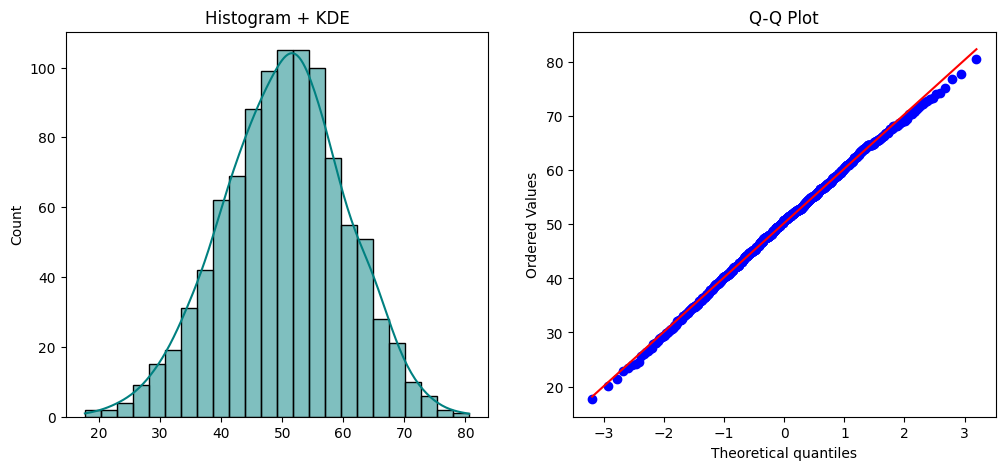

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Create a sample dataset
data = np.random.normal(loc=50, scale=10, size=1000)

# 1. Calculate Moments
print(f"Skewness: {stats.skew(data):.4f}")
print(f"Excess Kurtosis: {stats.kurtosis(data):.4f}")

# 2. Formal Shapiro-Wilk Test
stat, p = stats.shapiro(data)
print(f"Shapiro-Wilk Test: Statistics={stat:.3f}, p-value={p:.3f}")

# 3. Visual Layout
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
sns.histplot(data, kde=True, ax=ax1, color='teal')
ax1.set_title('Histogram + KDE')

# Q-Q Plot
stats.probplot(data, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot')

plt.show()